In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
import random
import csv
import time as t

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path="/content/drive/MyDrive/soc-sign-bitcoinalpha.csv"

In [4]:
G_og = nx.Graph()
with open(path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        G_og.add_edge(row[0], row[1])
all_edges = list(G_og.edges())
num_edges_to_keep = 7000
random_edges = random.sample(all_edges, num_edges_to_keep)

G = nx.Graph(random_edges)

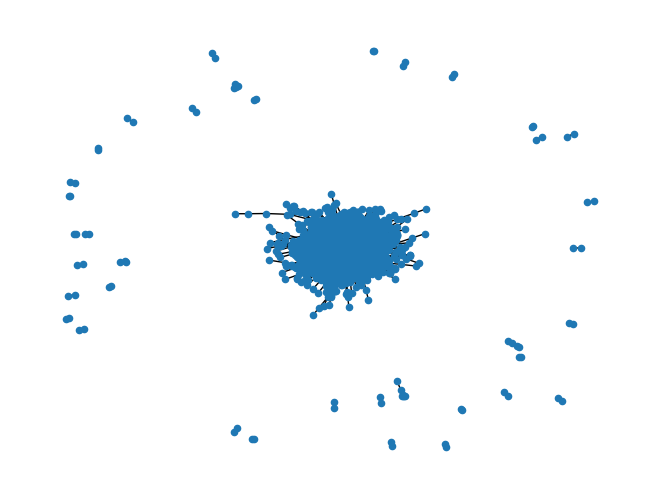

In [4]:
nx.draw(G, with_labels=False, node_size=20)
plt.show()

In [5]:
def girvan_newman(G):
    communities = community.girvan_newman(G)
    return tuple(sorted(c) for c in next(communities))

In [6]:
def label_propagation(G):
    communities = community.asyn_lpa_communities(G)
    return tuple(sorted(c) for c in communities)

In [7]:
def modularity(G):
    communities = community.greedy_modularity_communities(G)
    return tuple(sorted(c) for c in communities)

In [27]:
t_gn=t.time()
girvan_newman_communities = girvan_newman(G)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities = label_propagation(G)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities = modularity(G)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  1274.3662445545197  seconds
Time taken by the Label Propagation algorithm =  0.15946269035339355  seconds
Time taken by the Modularity algorithm =  6.751706600189209  seconds


In [22]:
print("Girvan-Newman communities:", girvan_newman_communities[5])
print("Label Propagation communities:", label_propagation_communities[5])
print("Modularity communities:", modularity_communities[5])

Girvan-Newman communities: ['1389', '3388']
Label Propagation communities: ['1194', '3315', '7531']
Modularity communities: ['10', '1018', '1037', '1040', '1059', '1068', '1137', '1146', '1153', '1156', '1276', '1324', '1329', '1331', '1337', '1369', '1407', '1424', '1425', '1468', '1508', '1511', '1527', '1550', '1592', '161', '1636', '170', '1711', '1740', '1762', '1765', '1776', '1778', '1797', '1823', '1838', '1944', '1945', '1961', '1988', '1992', '2179', '2204', '2209', '2213', '2215', '2223', '2234', '2250', '2265', '2332', '2357', '2361', '2412', '2519', '2558', '2582', '260', '271', '285', '2910', '2938', '2948', '2957', '2969', '2984', '2986', '3097', '315', '3165', '317', '3197', '334', '340', '410', '454', '455', '471', '482', '486', '492', '500', '522', '550', '596', '623', '635', '645', '664', '690', '695', '700', '71', '710', '719', '729', '7389', '7390', '7399', '7402', '7416', '742', '7511', '754', '755', '800', '809', '821', '883', '915', '918', '935', '941', '954', '

In [8]:
def calculate_nmi(communities_true, communities_pred):
    labels_true = {node: label for label, nodes in enumerate(communities_true) for node in nodes}
    labels_pred = {node: label for label, nodes in enumerate(communities_pred) for node in nodes}
    true_labels = [labels_true[node] for node in G.nodes()]
    pred_labels = [labels_pred[node] for node in G.nodes()]
    return normalized_mutual_info_score(true_labels, pred_labels)

In [13]:
nmi_girvan_newman = calculate_nmi(modularity_communities, girvan_newman_communities)
nmi_label_propagation = calculate_nmi(modularity_communities, label_propagation_communities)

In [14]:
print("NMI (Girvan-Newman):", nmi_girvan_newman)
print("NMI (Label Propagation):", nmi_label_propagation)

NMI (Girvan-Newman): 0.17275484996124674
NMI (Label Propagation): 0.48640638249731466


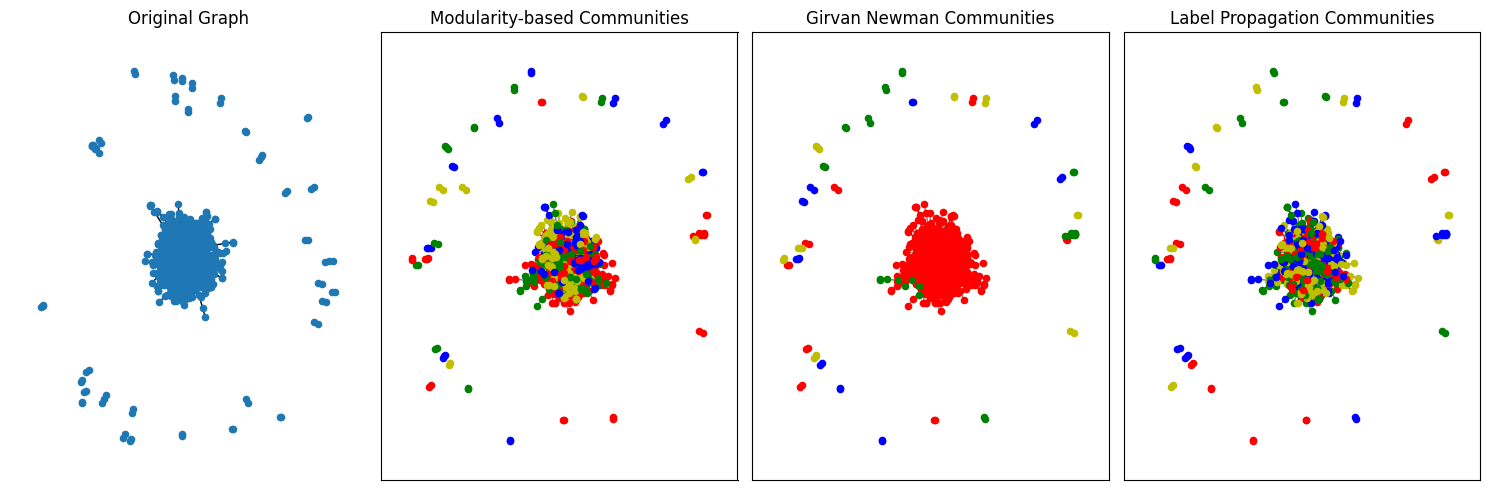

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

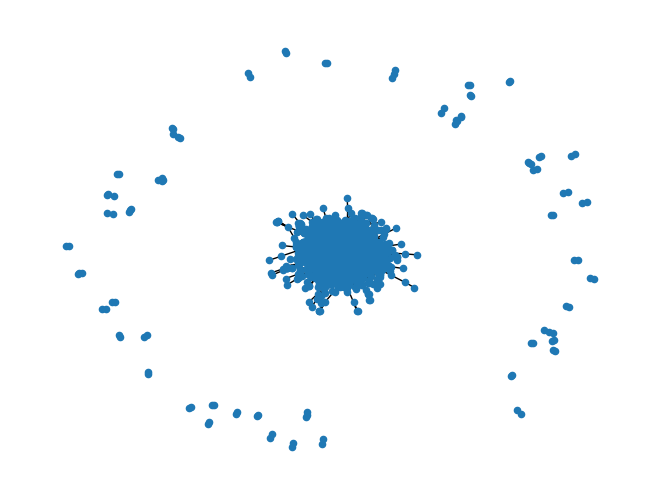

In [10]:
num_edges_to_keep = 6000
random_edges = random.sample(all_edges, num_edges_to_keep)
G_6k = nx.Graph(random_edges)
nx.draw(G_6k, with_labels=False, node_size=20)
plt.show()

In [11]:
t_gn=t.time()
girvan_newman_communities_6k = girvan_newman(G_6k)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities_6k = label_propagation(G_6k)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities_6k = modularity(G_6k)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  328.2793753147125  seconds
Time taken by the Label Propagation algorithm =  0.1362013816833496  seconds
Time taken by the Modularity algorithm =  8.40793776512146  seconds


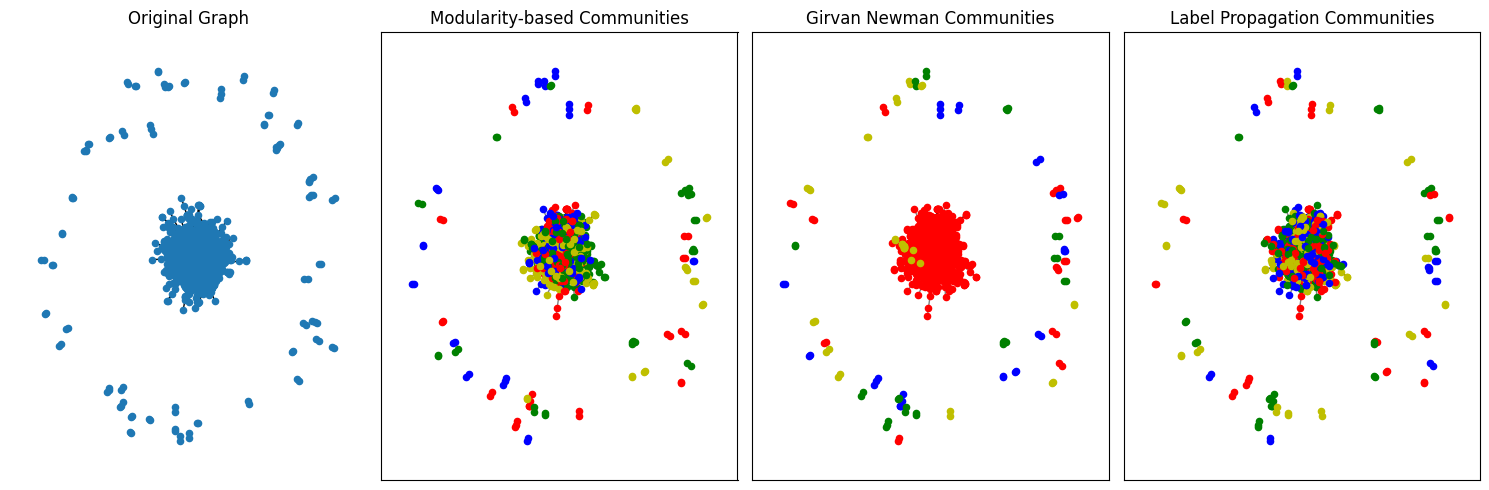

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G_6k, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G_6k)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities_6k):
    nx.draw_networkx_nodes(G_6k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G_6k, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities_6k):
    nx.draw_networkx_nodes(G_6k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_6k, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities_6k):
    nx.draw_networkx_nodes(G_6k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_6k, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

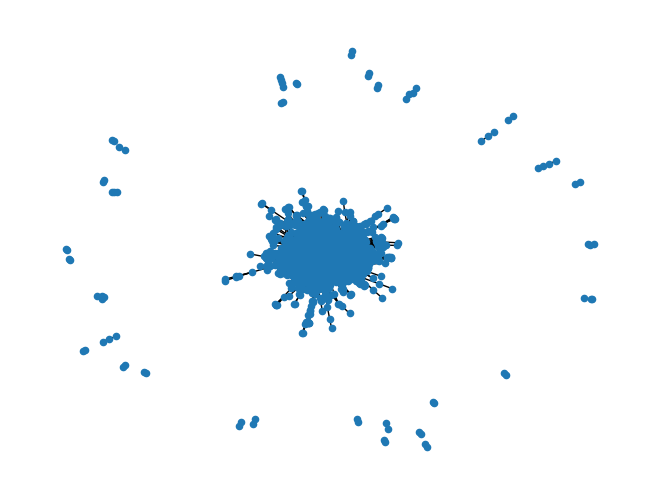

In [16]:
num_edges_to_keep = 5000
random_edges = random.sample(all_edges, num_edges_to_keep)
G_5k = nx.Graph(random_edges)
nx.draw(G_5k, with_labels=False, node_size=20)
plt.show()

In [17]:
t_gn=t.time()
girvan_newman_communities_5k = girvan_newman(G_5k)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities_5k = label_propagation(G_5k)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities_5k = modularity(G_5k)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  135.9370768070221  seconds
Time taken by the Label Propagation algorithm =  0.09103083610534668  seconds
Time taken by the Modularity algorithm =  4.495419979095459  seconds


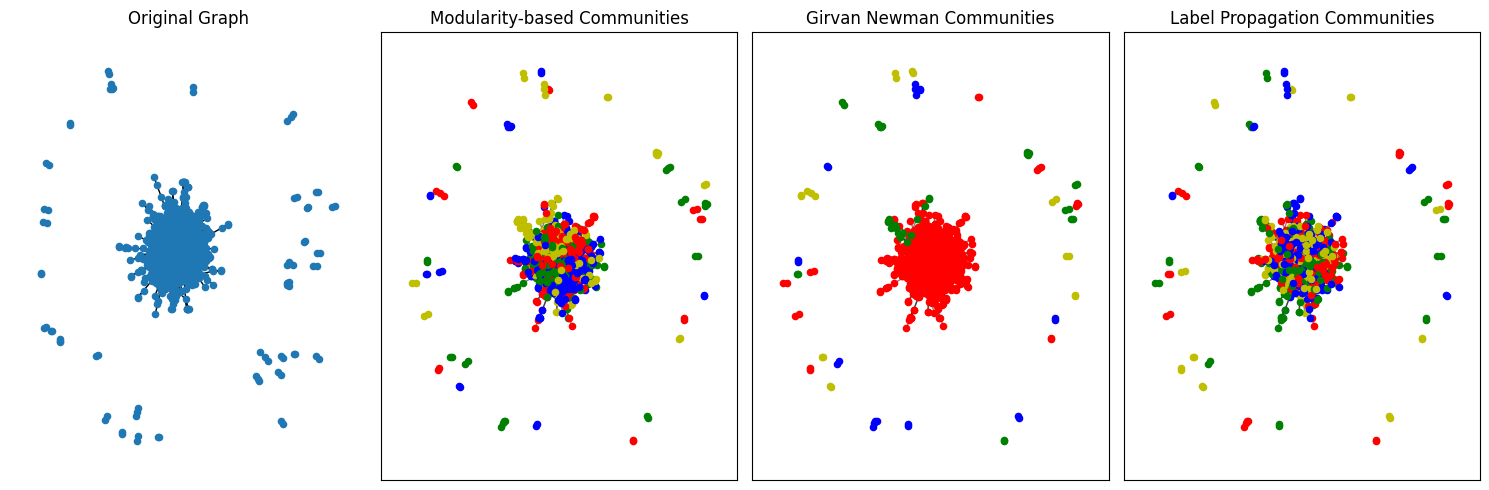

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G_5k, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G_5k)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities_5k):
    nx.draw_networkx_nodes(G_5k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G_5k, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities_5k):
    nx.draw_networkx_nodes(G_5k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_5k, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities_5k):
    nx.draw_networkx_nodes(G_5k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_5k, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

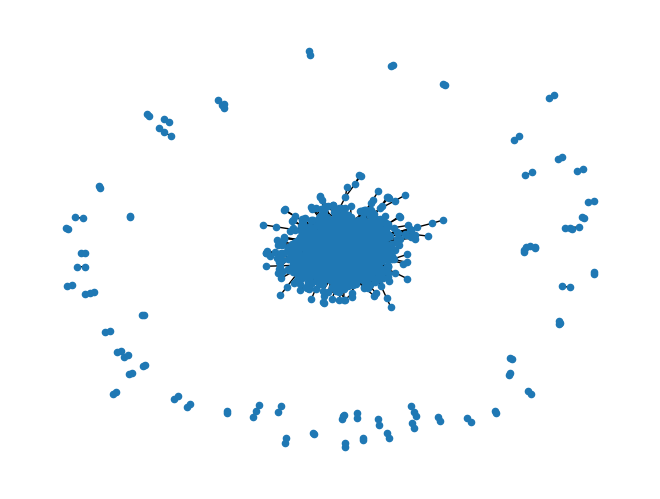

In [20]:
num_edges_to_keep = 4000
random_edges = random.sample(all_edges, num_edges_to_keep)
G_4k = nx.Graph(random_edges)
nx.draw(G_4k, with_labels=False, node_size=20)
plt.show()

In [21]:
t_gn=t.time()
girvan_newman_communities_4k = girvan_newman(G_4k)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities_4k = label_propagation(G_4k)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities_4k = modularity(G_4k)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  422.6694588661194  seconds
Time taken by the Label Propagation algorithm =  0.057338714599609375  seconds
Time taken by the Modularity algorithm =  2.84255313873291  seconds


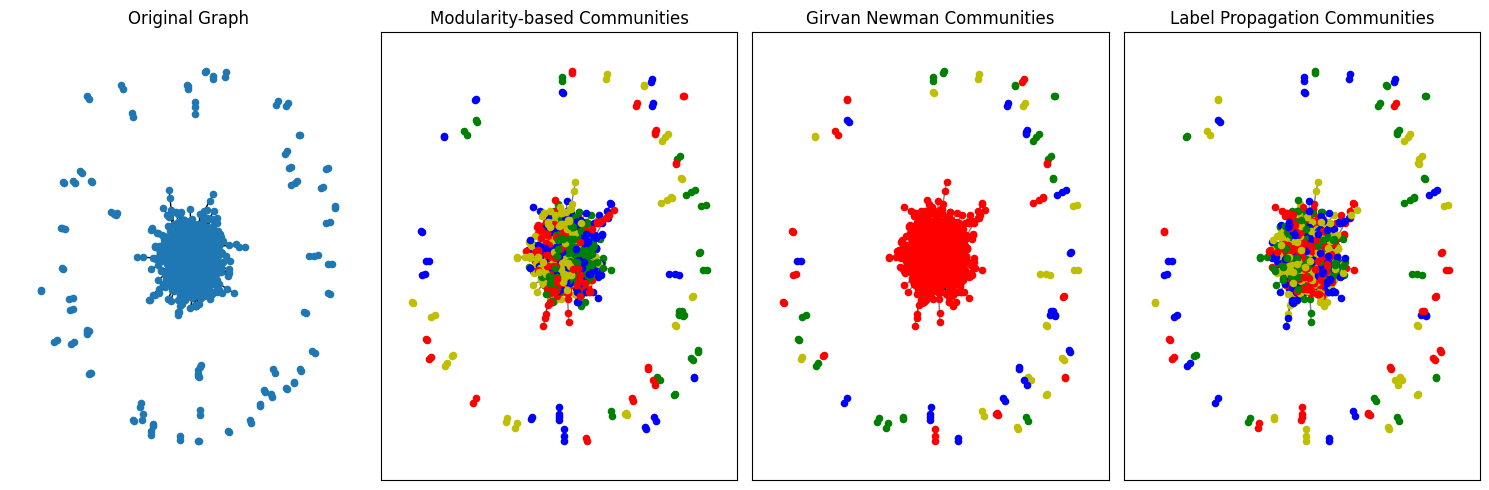

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G_4k, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G_4k)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities_4k):
    nx.draw_networkx_nodes(G_4k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G_4k, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities_4k):
    nx.draw_networkx_nodes(G_4k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_4k, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities_4k):
    nx.draw_networkx_nodes(G_4k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_4k, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

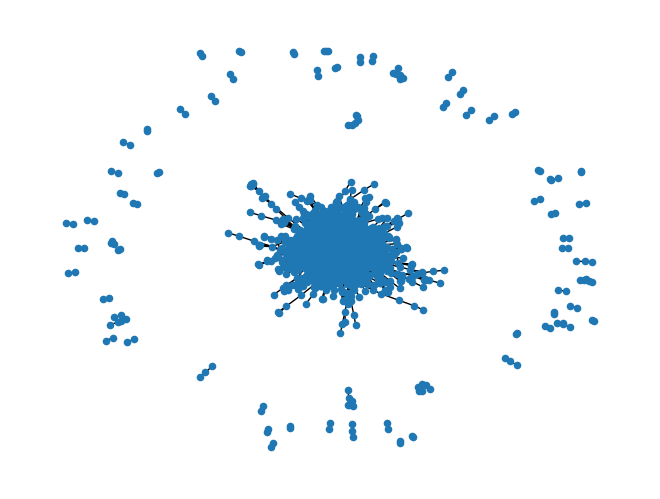

In [8]:
num_edges_to_keep = 3000
random_edges = random.sample(all_edges, num_edges_to_keep)
G_3k = nx.Graph(random_edges)
nx.draw(G_3k, with_labels=False, node_size=20)
plt.show()

In [10]:
t_gn=t.time()
girvan_newman_communities_3k = girvan_newman(G_3k)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities_3k = label_propagation(G_3k)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities_3k = modularity(G_3k)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  188.9365108013153  seconds
Time taken by the Label Propagation algorithm =  0.06389093399047852  seconds
Time taken by the Modularity algorithm =  1.7712922096252441  seconds


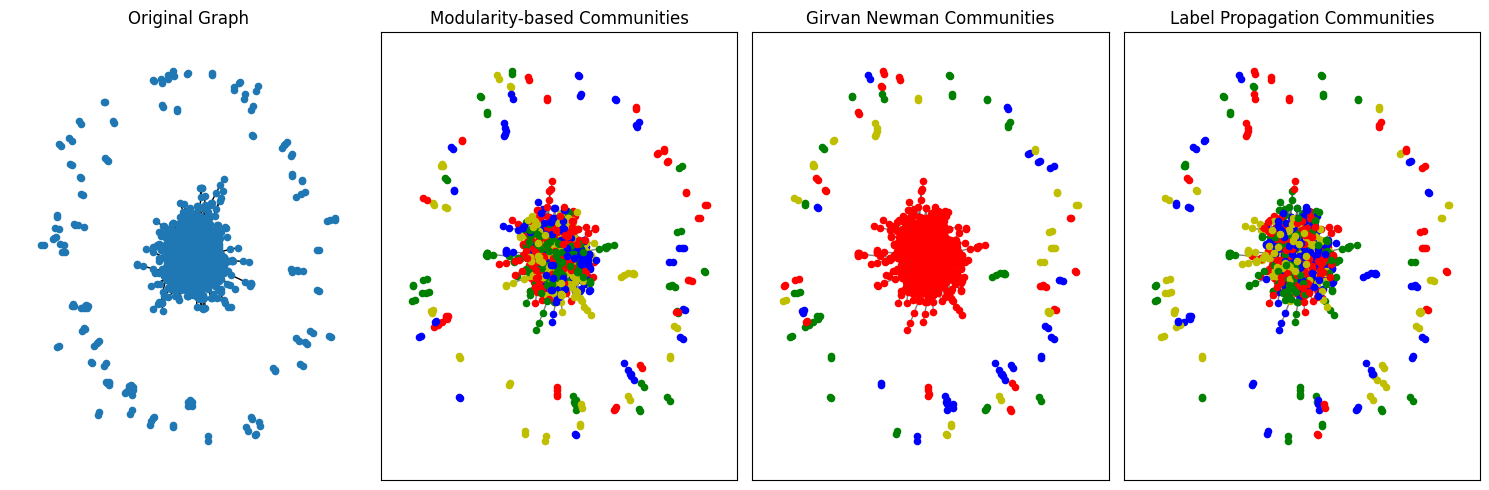

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G_3k, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G_3k)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities_3k):
    nx.draw_networkx_nodes(G_3k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G_3k, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities_3k):
    nx.draw_networkx_nodes(G_3k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_3k, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities_3k):
    nx.draw_networkx_nodes(G_3k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_3k, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

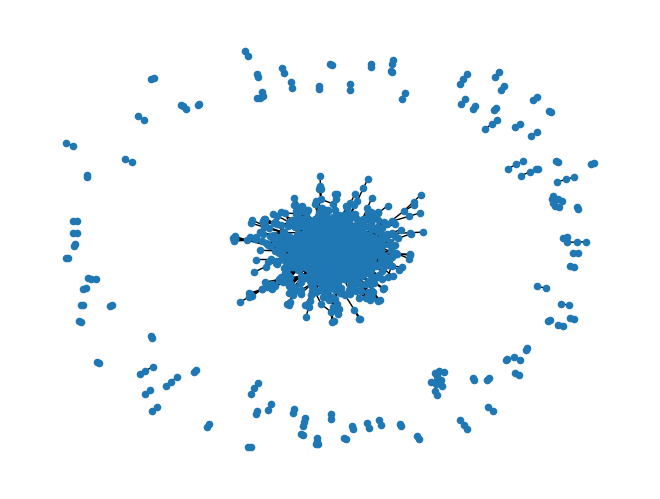

In [12]:
num_edges_to_keep = 2000
random_edges = random.sample(all_edges, num_edges_to_keep)
G_2k = nx.Graph(random_edges)
nx.draw(G_2k, with_labels=False, node_size=20)
plt.show()

In [13]:
t_gn=t.time()
girvan_newman_communities_2k = girvan_newman(G_2k)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities_2k = label_propagation(G_2k)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities_2k = modularity(G_2k)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  185.03327775001526  seconds
Time taken by the Label Propagation algorithm =  0.02745962142944336  seconds
Time taken by the Modularity algorithm =  0.5579111576080322  seconds


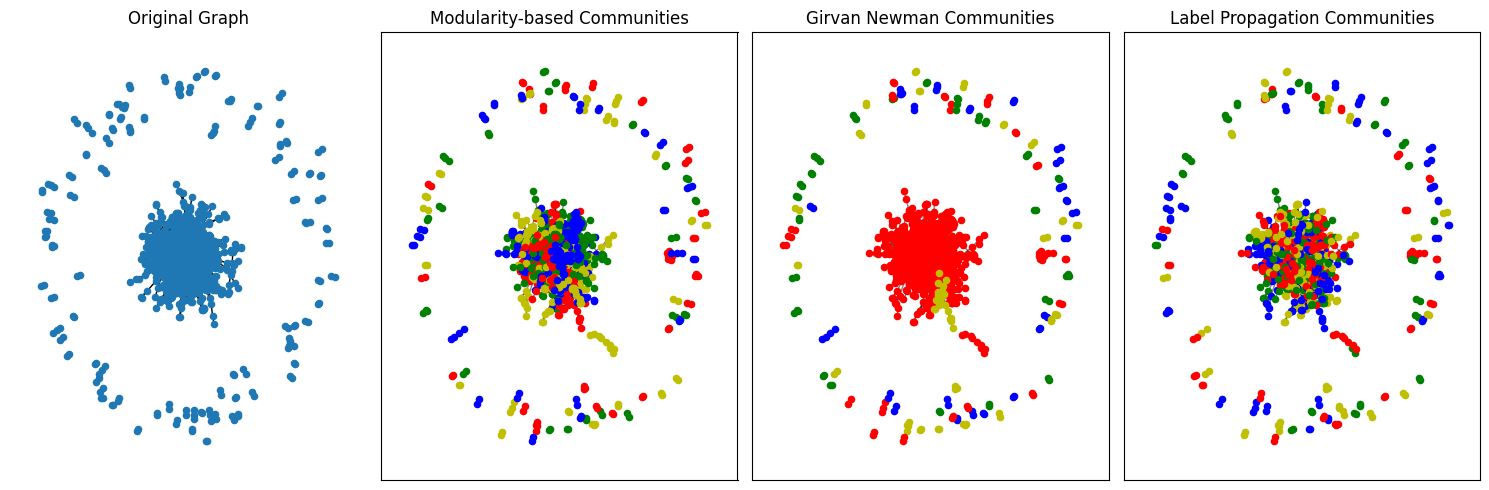

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G_2k, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G_2k)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities_2k):
    nx.draw_networkx_nodes(G_2k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G_2k, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities_2k):
    nx.draw_networkx_nodes(G_2k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_2k, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities_2k):
    nx.draw_networkx_nodes(G_2k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_2k, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

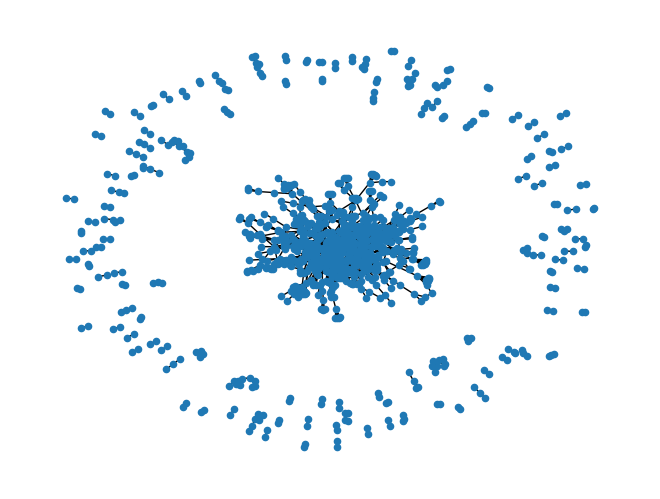

In [15]:
num_edges_to_keep = 1000
random_edges = random.sample(all_edges, num_edges_to_keep)
G_1k = nx.Graph(random_edges)
nx.draw(G_1k, with_labels=False, node_size=20)
plt.show()

In [16]:
t_gn=t.time()
girvan_newman_communities_1k = girvan_newman(G_1k)
print("Time taken by the Girvan-Newman algorithm = ", t.time()-t_gn, " seconds")
t_lp=t.time()
label_propagation_communities_1k = label_propagation(G_1k)
print("Time taken by the Label Propagation algorithm = ", t.time()-t_lp, " seconds")
t_mod=t.time()
modularity_communities_1k = modularity(G_1k)
print("Time taken by the Modularity algorithm = ", t.time()-t_mod, " seconds")

Time taken by the Girvan-Newman algorithm =  24.732447385787964  seconds
Time taken by the Label Propagation algorithm =  0.015288114547729492  seconds
Time taken by the Modularity algorithm =  0.1297602653503418  seconds


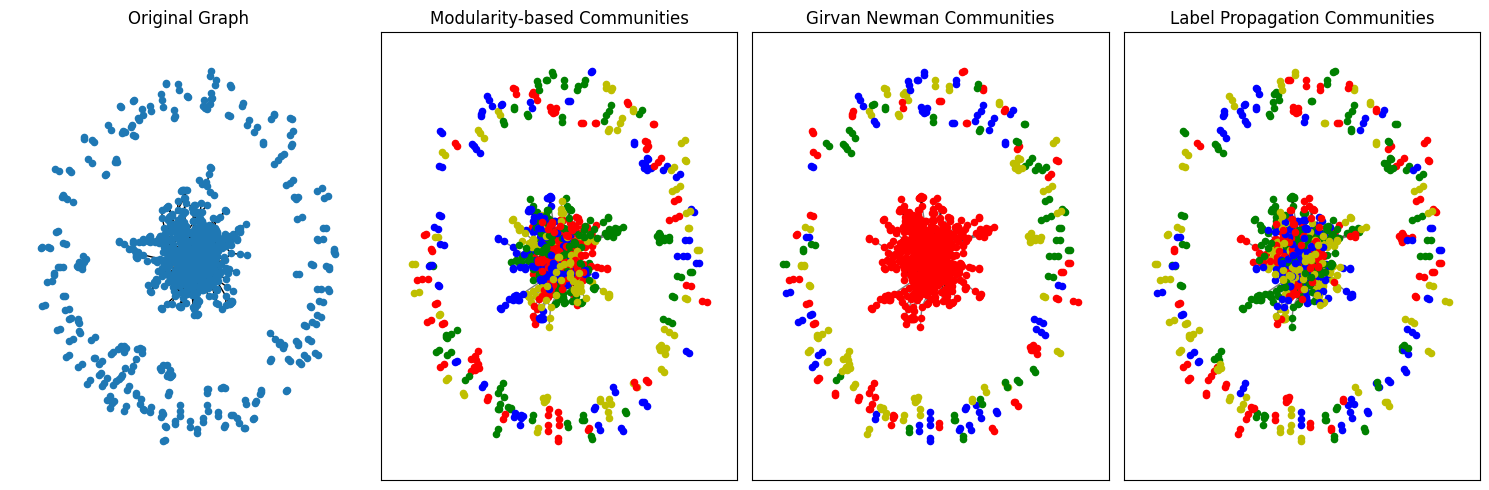

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
nx.draw(G_1k, with_labels=False, node_size=20)
plt.title('Original Graph')

plt.subplot(142)
pos = nx.spring_layout(G_1k)
colors = ['r', 'g', 'b', 'y']  # Define colors for communities
for i, comm in enumerate(modularity_communities_1k):
    nx.draw_networkx_nodes(G_1k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i}', node_size=20)
nx.draw_networkx_edges(G_1k, pos, alpha=0.5, edge_color='black')
plt.title('Modularity-based Communities')

plt.subplot(143)
for i, comm in enumerate(girvan_newman_communities_1k):
    nx.draw_networkx_nodes(G_1k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_1k, pos, alpha=0.5, edge_color='black')
plt.title('Girvan Newman Communities')

plt.subplot(144)
for i, comm in enumerate(label_propagation_communities_1k):
    nx.draw_networkx_nodes(G_1k, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(G_1k, pos, alpha=0.5, edge_color='black')
plt.title('Label Propagation Communities')

# plt.legend()
plt.tight_layout()
plt.show()

In [18]:
no_edges=[]
for i in range(7):
  no_edges.append((i+1)*1000)

time_taken_gn=[24.732, 185.033, 188.936, 422.669, 135.937, 328.279, 1274.367]
time_taken_lp=[0.015, 0.0274, 0.064, 0.057, 0.091, 0.136, 0.159]
time_taken_mod=[0.130, 0.558, 1.771, 2.842, 4.493, 8.408, 6.752]

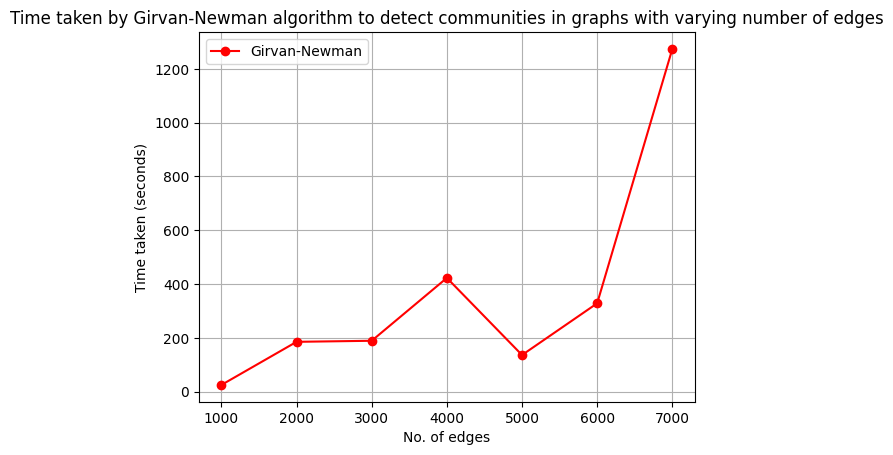

In [21]:
plt.plot(no_edges, time_taken_gn, marker='o', linestyle='-', color='r', label='Girvan-Newman')
# plt.plot(no_edges, time_taken_lp, marker='s', linestyle='--', color='g', label='Label Propagation')
# plt.plot(no_edges, time_taken_mod, marker='^', linestyle=':', color='b', label='Modularity')

plt.xlabel('No. of edges')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by Girvan-Newman algorithm to detect communities in graphs with varying number of edges')
plt.legend()
plt.grid(True)
plt.show()

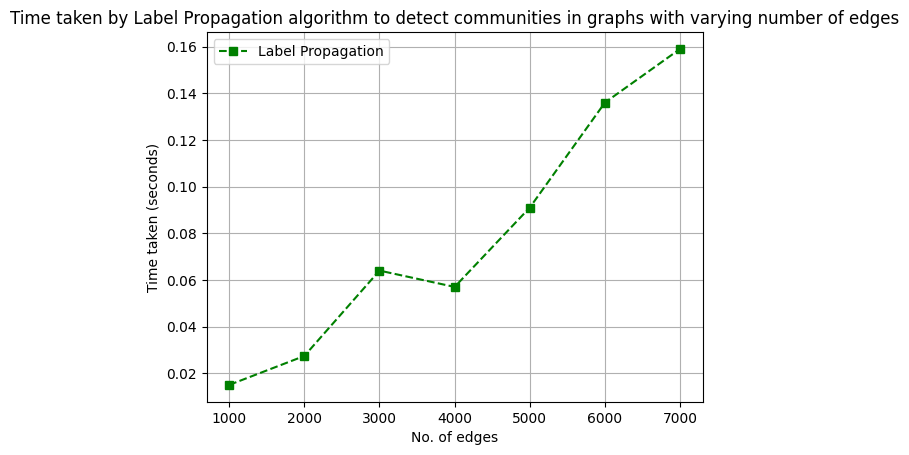

In [22]:
# plt.plot(no_edges, time_taken_gn, marker='o', linestyle='-', color='r', label='Girvan-Newman')
plt.plot(no_edges, time_taken_lp, marker='s', linestyle='--', color='g', label='Label Propagation')
# plt.plot(no_edges, time_taken_mod, marker='^', linestyle=':', color='b', label='Modularity')

plt.xlabel('No. of edges')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by Label Propagation algorithm to detect communities in graphs with varying number of edges')
plt.legend()
plt.grid(True)
plt.show()

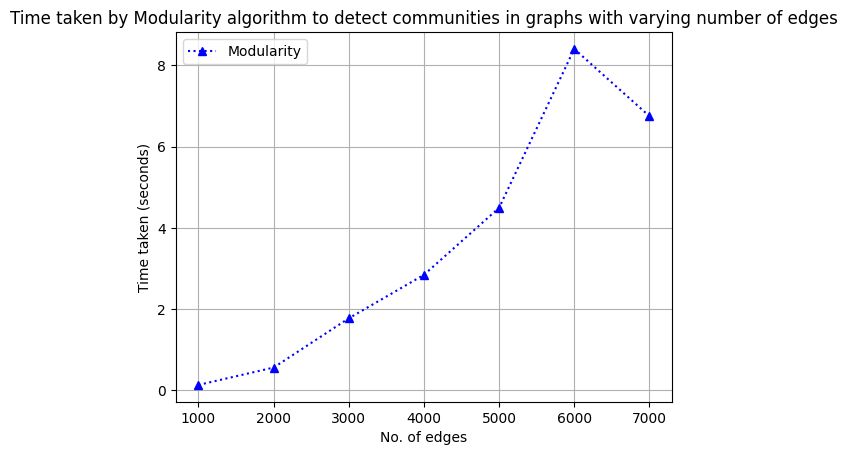

In [24]:
# plt.plot(no_edges, time_taken_gn, marker='o', linestyle='-', color='r', label='Girvan-Newman')
# plt.plot(no_edges, time_taken_lp, marker='s', linestyle='--', color='g', label='Label Propagation')
plt.plot(no_edges, time_taken_mod, marker='^', linestyle=':', color='b', label='Modularity')

plt.xlabel('No. of edges')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by Modularity algorithm to detect communities in graphs with varying number of edges')
plt.legend()
plt.grid(True)
plt.show()

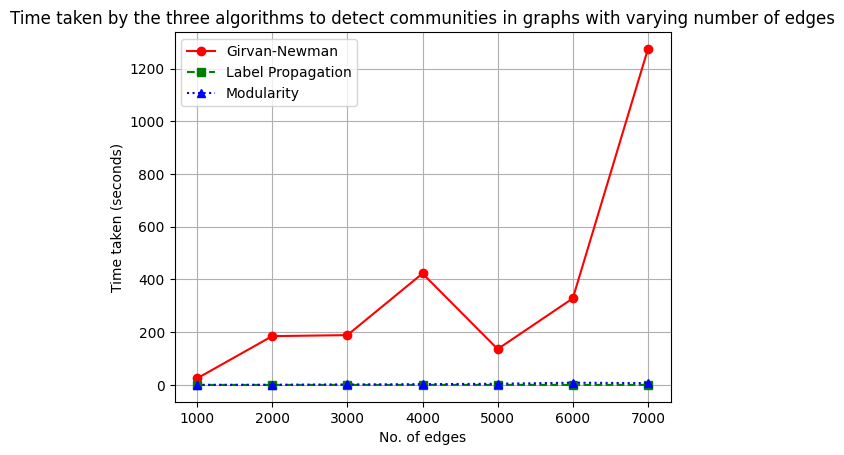

In [25]:
plt.plot(no_edges, time_taken_gn, marker='o', linestyle='-', color='r', label='Girvan-Newman')
plt.plot(no_edges, time_taken_lp, marker='s', linestyle='--', color='g', label='Label Propagation')
plt.plot(no_edges, time_taken_mod, marker='^', linestyle=':', color='b', label='Modularity')

plt.xlabel('No. of edges')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by the three algorithms to detect communities in graphs with varying number of edges')
plt.legend()
plt.grid(True)
plt.show()